In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

#### Activation functions

In [ ]:
def gelu(x):
   # gelu(x) = 0.5 * x * (1 + tanh(sqrt(2 / pi) * (x + 0.044715 * x^3)))
   return x * torch.sigmoid(1.702 * x)


def relu(x):
   # relu(x) = max(0, x)
   return torch.maximum(x, torch.tensor(0.0))


def swish(x, beta=1):
   # swish(x) = x * sigmoid(beta * x) = x / (1 + exp(-beta * x))
   # when beta = 1, swish is the same as silu
   return x * (1 / (1 + torch.exp(-beta * x)))


In [14]:
x_values = torch.linspace(-5, 5, 500)

gelu_values = gelu(x_values)
relu_values = relu(x_values)
swish_values = swish(x_values)
swish_values_2 = swish(x_values, beta=0.5)

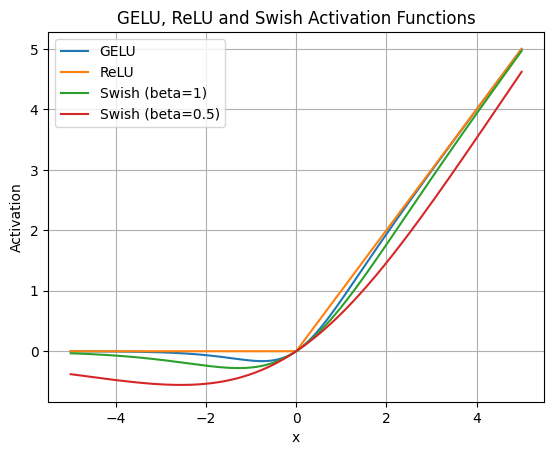

In [15]:
plt.plot(x_values, gelu_values, label='GELU')
plt.plot(x_values, relu_values, label='ReLU')
plt.plot(x_values, swish_values, label='Swish (beta=1)')
plt.plot(x_values, swish_values_2, label='Swish (beta=0.5)')
plt.title("GELU, ReLU and Swish Activation Functions")
plt.xlabel("x")
plt.ylabel("Activation")
plt.grid()
plt.legend()
plt.show()

#### Gated Linear Units and its variants

$$ \text{GLU}(x,W,V,b,c) = \sigma(xW+b)\otimes (xV+c) $$

$\sigma$ sigmoid function, $\otimes$ element-wise product

$$ \text{SwiGLU}(x,W,V,b,c) = \text{Swish}_1(xW+b)\otimes (xV+c) $$

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, dim: int, hidden_dim: int, dropout: float = 0.2):
        super().__init__()
        self.W1 = nn.Linear(dim, hidden_dim)
        self.W2 = nn.Linear(dim, hidden_dim)
        self.linear = nn.Linear(hidden_dim, dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        swiglu_x = F.silu(self.W1(x)) * self.W2(x)
        return self.dropout(self.linear(swiglu_x))